
**GOAL OF THIS NOTEBOOK**  
1. Explore inherent feature selection methods given by Random Forest.  
2. Determine semi-arbitrary cutoff of % important, reduce using those features  
3. Begin introductory model fitting, with goal of minimizing MSE as compared to $R^2$.  


In [2]:
'''
NOTE
The only thing you should have to change to be able to
fully execute everything here is the "path" variable in the first block of code below. 
'''

'\nNOTE\nThe only thing you should have to change to be able to\nfully execute everything here is the "path" variable in the first block of code below. \n'

In [ ]:
'''
Data Pre-Processing
'''

In [1]:
import os
from zipfile import ZipFile

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
'''
Change your directory to original project directory
'''
os.chdir("/Users/anhthyngo/Documents/NYU/Fall 2019/DS-GA 1001/project/ds-ga1001/")

In [3]:
cwd = os.getcwd()
datadir = '/'.join(cwd.split('/')) + '/data/'
listings = datadir + 'airbnb_no_impute_20191202.csv.zip'
print(listings)

/Users/anhthyngo/Documents/NYU/Fall 2019/DS-GA 1001/project/ds-ga1001/data/airbnb_no_impute_20191202.csv.zip


In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
zf = ZipFile(listings) 
data = pd.read_csv(zf.open("airbnb_no_impute_20191202.csv"), low_memory=False)

data.head(5)
data.shape

(47720, 260)

(array([4.707e+04, 4.780e+02, 7.000e+01, 4.300e+01, 1.200e+01, 8.000e+00,
        7.000e+00, 9.000e+00, 0.000e+00, 6.000e+00, 1.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 1.100e+01]),
 array([    0.        ,   666.66666667,  1333.33333333,  2000.        ,
         2666.66666667,  3333.33333333,  4000.        ,  4666.66666667,
         5333.33333333,  6000.        ,  6666.66666667,  7333.33333333,
         8000.        ,  8666.66666667,  9333.33333333, 10000.        ]),
 <a list of 15 Patch objects>)

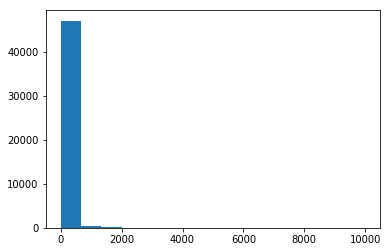

In [5]:
plt.hist(data['price'],bins=15)

In [6]:
columns = data.columns


data_no = []

for col in columns:
    data_no.append([col,data[col].quantile(0.02),data[col].quantile(0.98)])
        
df = pd.DataFrame(data_no, columns = ['column','5','95']) 
df.head()

,column,5,95
0,host_response_rate,0.330000,1.00000
1,host_listings_count,0.000000,168.00000
2,host_total_listings_count,0.000000,168.00000
3,zipcode,10002.000000,11418.00000
4,latitude,40.619551,40.85177


In [7]:
for index, row in df.iterrows():
   
    data = data[(data[df['column'][index]]>= df['5'][index]) & (data[df['column'][index]] <= df['95'][index])]
    print(data.shape)


(31072, 260)
(30132, 260)
(30132, 260)
(28928, 260)
(27683, 260)
(26957, 260)
(26418, 260)
(25938, 260)
(25759, 260)
(25631, 260)
(25298, 260)
(24834, 260)
(24593, 260)
(24593, 260)
(24510, 260)
(24491, 260)
(24491, 260)
(24491, 260)
(24491, 260)
(24491, 260)
(24491, 260)
(24491, 260)
(24146, 260)
(23356, 260)
(22871, 260)
(19746, 260)
(19694, 260)
(19667, 260)
(19576, 260)
(19513, 260)
(19412, 260)
(19373, 260)
(19318, 260)
(19240, 260)
(18923, 260)
(18582, 260)
(18319, 260)
(17920, 260)
(15938, 260)
(13242, 260)
(13049, 260)
(13049, 260)
(13028, 260)
(13028, 260)
(13028, 260)
(13028, 260)
(13028, 260)
(13028, 260)
(13028, 260)
(13028, 260)
(13028, 260)
(13028, 260)
(13028, 260)
(13028, 260)
(13028, 260)
(13028, 260)
(12827, 260)
(12810, 260)
(12810, 260)
(12810, 260)
(12810, 260)
(12810, 260)
(12793, 260)
(12793, 260)
(12793, 260)
(12781, 260)
(12781, 260)
(12769, 260)
(12769, 260)
(12769, 260)
(12769, 260)
(12769, 260)
(12767, 260)
(12767, 260)
(12767, 260)
(12482, 260)
(12482, 260)

(array([2085., 2252., 2039., 1323.,  830.,  702.,  438.,  177.,  217.,
          94.,   41.,   68.,   48.,   10.,   53.]),
 array([ 34. ,  66.4,  98.8, 131.2, 163.6, 196. , 228.4, 260.8, 293.2,
        325.6, 358. , 390.4, 422.8, 455.2, 487.6, 520. ]),
 <a list of 15 Patch objects>)

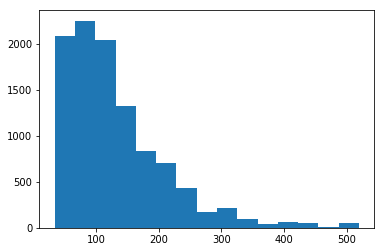

In [8]:
plt.hist(data['price'],bins=15)

In [9]:
X = data.drop('price',axis=1)
Y = data.pop('price')

In [10]:
print(X.shape)
print(X)

(10377, 259)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
nan_cols = [i for i in X.columns if X[i].isnull().any()]
nan_cols

[]

In [13]:
'''
Some columns have NANs. To move forward with feature selection, these will be imputed. 
When we get to the pipeline implementation, we can be more careful about this. 
For now, as in line with the rest of our analysis, we'll impute with median. 

We will separately impute our training and testing split (block below)
'''

"\nSome columns have NANs. To move forward with feature selection, these will be imputed. \nWhen we get to the pipeline implementation, we can be more careful about this. \nFor now, as in line with the rest of our analysis, we'll impute with median. \n\nWe will separately impute our training and testing split (block below)\n"

In [14]:
'''
PART 1 -- INHERENT FEATURE SELECTION OF RANDOM FOREST
Essentially here we're just creating some notion of how a Regression RF does in terms of mean accuracy with or without 
certain features.
While it's worth nothing there is zero model optimization going on here, there's still information to be gained. 
'''
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=.2,random_state=42)

In [15]:
for col in nan_cols:
    Xtrain[col].fillna(Xtrain[col].median(),inplace=True)
    Xtest[col].fillna(Xtest[col].median(),inplace=True)



In [16]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
model = regr.fit(Xtrain,Ytrain)

/Users/anhthyngo/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [17]:
'''
Now that the model has been fit, we can look at what features it deems to be important. 
In addition, it's worth knowing the ratio of important variables to overall features. 
'''

"\nNow that the model has been fit, we can look at what features it deems to be important. \nIn addition, it's worth knowing the ratio of important variables to overall features. \n"

In [18]:
feature_importances = model.feature_importances_
sorted_indices = np.argsort(feature_importances)

In [19]:
'''
The following block will produce a sorted list of the columns with a feature importance > .005,
as well as some additional information (discussed above) that is worth knowing.
'''

'\nThe following block will produce a sorted list of the columns with a feature importance > .005,\nas well as some additional information (discussed above) that is worth knowing.\n'

In [20]:
total = 0 
reduced_features = []
for i in range(len(sorted_indices)):
    feature , importance = list(X.columns)[sorted_indices[-i]], feature_importances[sorted_indices[-i]]
    if(importance > .005):
        reduced_features.append(feature)
        total+=importance
        print(feature,importance)
print("-------------------------------------------------------------------------")
print(len(feature_importances[feature_importances>=.005]),"variables account for",round(total*100,2),"% of the feature importance.")
print("\n")
print("Can account for",round(total*100,2),"% of the feature importance deemed by the model with",round((len(feature_importances[feature_importances>=.005])/X.shape[1])*100,2),"% \n of the original number of features")
print("-------------------------------------------------------------------------")

room_type_Entire home/apt 0.33768360524965063
zipcode 0.10377417196946767
bedrooms 0.0752999576764703
longitude 0.05761194929564026
latitude 0.04214933929328096
cleaning_fee 0.025602194114452796
accommodates 0.023050163652737272
bathrooms 0.022900397092237745
availability_60 0.020986219060952705
availability_365 0.014847781664250296
availability_90 0.01381432201751489
reviews_per_month 0.013416381595139712
guests_included 0.012322303873223046
availability_30 0.012261161490314917
review_scores_rating 0.010714678548164805
number_of_reviews 0.009670729925755284
security_deposit 0.009610834541142815
minimum_nights 0.009284002853015784
extra_people 0.008368965611627484
maximum_minimum_nights 0.007615685648763563
minimum_minimum_nights 0.007124921263434509
minimum_nights_avg_ntm 0.005991708289762878
number_of_reviews_ltm 0.0057553720801132744
-------------------------------------------------------------------------
23 variables account for 84.99 % of the feature importance.


Can account for

In [21]:
'''
CONCLUSION
29 variables account for 92% of feature importance seems to be a good tradeoff between
complexity and feature relevance. We can move forward from here
'''

'\nCONCLUSION\n29 variables account for 92% of feature importance seems to be a good tradeoff between\ncomplexity and feature relevance. We can move forward from here\n'

In [22]:
'''
PART 2a-- CREATING REDUCED DATASET
'''

'\nPART 2a-- CREATING REDUCED DATASET\n'

In [23]:
'''
Re-reading in data so we don't have any carryover from modifications in step1
'''

#data = pd.read_csv(zf.open("airbnb_no_impute_20191202.csv"), low_memory=False)
#reduced_features.append('price')
data =  data[[c for c in data.columns if c in reduced_features]]
data['price'] = Y
data.head()

,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,reviews_per_month,extra_people,cleaning_fee,security_deposit,room_type_Entire home/apt,price
5,10009,40.72764,-73.97949,2,1.0,1.0,2,30,30,30,30.0,12,42,72,347,94,0,95.0,0.73,15.0,75.0,500.0,1,116.0
7,10025,40.80316,-73.96545,2,1.0,1.0,1,5,5,5,5.0,1,1,1,40,54,12,93.0,0.43,0.0,75.0,450.0,1,135.0
18,11216,40.68371,-73.94028,5,1.0,1.0,4,2,2,2,2.0,3,14,30,279,96,27,95.0,0.78,15.0,90.0,300.0,1,120.0
19,11218,40.65599,-73.97519,2,1.0,1.0,1,1,1,1,1.0,19,48,78,78,21,17,96.0,1.30,20.0,35.0,0.0,0,60.0
23,10027,40.81305,-73.95466,2,1.0,1.0,1,2,2,2,2.0,0,4,27,287,95,22,98.0,1.48,15.0,50.0,150.0,0,52.0


(array([2085., 2252., 2039., 1323.,  830.,  702.,  438.,  177.,  217.,
          94.,   41.,   68.,   48.,   10.,   53.]),
 array([ 34. ,  66.4,  98.8, 131.2, 163.6, 196. , 228.4, 260.8, 293.2,
        325.6, 358. , 390.4, 422.8, 455.2, 487.6, 520. ]),
 <a list of 15 Patch objects>)

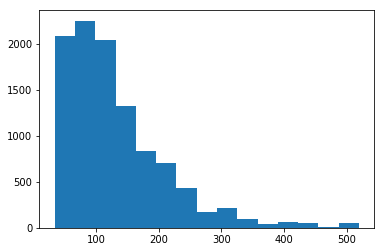

In [24]:
plt.hist(data['price'],bins=15)

In [25]:
data.shape

(10377, 24)

In [26]:
'''
If you want to read this csv onto your local system and run some models locally, just run this 
block with a specified path.

NOTE: outside of feature reduction, there are no differences between this and the original dataset. 
the 5 columns will still have NANs, there is no train-test splitting going on, etc. 
'''

data.to_csv(os.getcwd()+'/data/airbnb_feature_selection.csv.gz', index=False, compression='gzip')

In [ ]:
'''
PART 2b -- MODELING

Now we can start with some modeling to see what can produce the lowest MSE. 
OPTIONS FOR MODELING: 
Linear Regression - OLS (cross validate)
Linear Regression - Lasso (cross validate, parameter grid search)
Linear Regression - Ridge (cross validate, parameter grid search)
Random Forest - (hyperparameter grid search)
XGBoost - (hyperparameter grid search)
'''